# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [6]:
import numpy as np
def f(x):
    sol = (x**2)*np.sin(x)
    return sol;

    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [7]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [8]:
def g(x):
    sol = (-x**2)*(np.cos(x)) + 2*x*(np.sin(x)) + 2*(np.cos(x)) - 2
    return sol;

    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [9]:
assert g(0) == 0.

In [10]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [11]:
def integrate_analytic(xmin, xmax):
    sol = g(xmax) - g(xmin)
    return sol ;

    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [12]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [22]:
def integrate_numeric(xmin, xmax, N):
    if N % 2 == 1:
        raise ValueError ("N must be an even integer")
    dx = (xmax - xmin)/N
    x = np.linspace(xmin, xmax, N+1)
    y = (x**2) * np.sin(x)
    sol = (dx/3) * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return sol;
    
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [23]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

ValueError: N must be an even integer

In [15]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


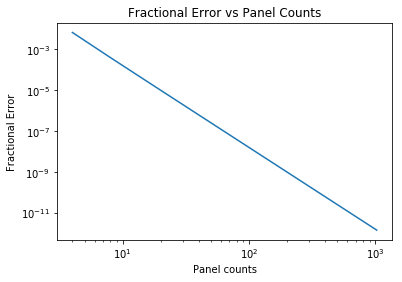

In [26]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_numeric_1 = integrate_numeric(x0, x1, 4)
result_numeric_2 = integrate_numeric(x0, x1, 8)
result_numeric_3 = integrate_numeric(x0, x1, 16)
result_numeric_4 = integrate_numeric(x0, x1, 32)
result_numeric_5 = integrate_numeric(x0, x1, 64)
result_numeric_6 = integrate_numeric(x0, x1, 128)
result_numeric_7 = integrate_numeric(x0, x1, 256)
result_numeric_8 = integrate_numeric(x0, x1, 512)
result_numeric_9 = integrate_numeric(x0, x1, 1024)
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fractional_error= [(result_analytic - result_numeric_1), (result_analytic - result_numeric_2), (result_analytic - result_numeric_3), (result_analytic - result_numeric_4), (result_analytic - result_numeric_5), (result_analytic - result_numeric_6), (result_analytic - result_numeric_7), (result_analytic - result_numeric_8), (result_analytic - result_numeric_9)] 
plt.title('Fractional Error vs Panel Counts')
plt.xlabel('Panel counts')
plt.ylabel('Fractional Error')
plt.loglog(panel_counts, fractional_error)
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method. If the number of panels are taken too large, then there are numerical round-off issues. The functions and the derivatives have to be smooth for the higher order to work. Taking N > 10^4, would be too large for Simpson's rule, for example.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

It would be the same, increasing the number of panels would increase the accuracy.